In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import pcolor, show, colorbar, xticks, yticks

# Za lijepe grafove
pd.set_option('display.mpl_style', 'default')

# Prikazi sve retke i sve stupce
pd.set_option('display.width', 100000) 
pd.set_option('display.max_columns', 50) 

# Ucitavanje podataka
utakmice = pd.read_excel('../data/cleanData.xlsx', sheetname='Utakmice')
akcije = pd.read_excel('../data/cleanData.xlsx', sheetname='Akcije')

In [2]:
# [((., .), .)] -> [(., ., .)]
def flatten(lst):
    if isinstance(lst, dict):
        lst = lst.items()
    return [(x[0][0], x[0][1], x[1]) for x in lst]

In [3]:
def list_to_df(lst):
    lst = flatten(lst)
    df = pd.DataFrame(lst, columns=['source', 'target', '#pass'])
    return df

#Manipulacija podatcima

Spoji frame-ove po ID-u utakmice.

In [4]:
utakmice = utakmice[['ID', 'domaciID', 'gostiID', 'domaciFormacija', 'gostiFormacija']]
utakmice.head()

ID  domaciID  gostiID domaciFormacija gostiFormacija
0  6770     10347    10453         4-3-1-2          4-3-3
1  6765     10653    10307         4-3-1-2          3-5-2
2  6756     10437    10347           4-4-2        4-2-3-1
3  6755     10307    10646           3-6-1        4-2-3-1
4  6730     10347    10576         4-3-1-2        4-2-3-1

In [5]:
akcije = akcije[['ID', 'actionID', 'playerID', 'targetPlayerID', 'playerTeam', 'playerPositionID', 'targetPositionID']]
akcije.head()

ID  actionID  playerID  targetPlayerID playerTeam  playerPositionID  targetPositionID
0  6258       247     21913            1992       home                17                18
1  6258       247      1992            1892       home                18                15
2  6258       247      1892          201366       home                15                14
3  6258       247    201366          114354       home                14                13
4  6258       247    114354            1892       home                13                15

In [6]:
df = akcije.merge(utakmice, on='ID')
df.head()

ID  actionID  playerID  targetPlayerID playerTeam  playerPositionID  targetPositionID  domaciID  gostiID domaciFormacija gostiFormacija
0  6258       247     21913            1992       home                17                18     10442    10347           4-4-2        4-4-1-1
1  6258       247      1992            1892       home                18                15     10442    10347           4-4-2        4-4-1-1
2  6258       247      1892          201366       home                15                14     10442    10347           4-4-2        4-4-1-1
3  6258       247    201366          114354       home                14                13     10442    10347           4-4-2        4-4-1-1
4  6258       247    114354            1892       home                13                15     10442    10347           4-4-2        4-4-1-1

#Dodavanja u timu

* Eintracht Frankfurt ima ID **10347**
* Borussia M'gladbach ima ID **10307**

In [7]:
def get_all_247_by_team(df, teamID):
    # Filtriraj akciju dodavanja
    df = df.loc[df['actionID'] == 247]

    # Filtriraj utakmice zeljenog tima
    home = df.loc[df['domaciID'] == teamID]
    away = df.loc[df['gostiID'] == teamID]
    
    # Filtriraj samo dodavanja igraca zeljenog tima
    home = home.loc[home['playerTeam'] == 'home']
    away = away.loc[away['playerTeam'] == 'away']
    
    _all = pd.concat([home, away])
    
    # Spoji u jedan data frame
    return home, away, _all

In [8]:
# Sortira dict po vrijednosti i vraca listu [(key, value)]
def sortDictByValue(d):
    return sorted(d.items(), key=lambda x: x[1], reverse=True)

In [9]:
# Prima pandas DataFrame i imena stupaca na temelju kojih stvara matricu.
# Vraca adjacency matricu u obliku dict {(col1, col2): val} na temelju predanih imena stupaca.
def getAij(df, col1, col2):
    Aij = {}
    for index, row in df.iterrows():
        key = (row[col1], row[col2])
        value = Aij.get(key, 0)
        Aij[key] = value + 1
    return Aij

In [10]:
e_h, e_a, e = get_all_247_by_team(df, 10347)
e.head()

ID  actionID  playerID  targetPlayerID playerTeam  playerPositionID  targetPositionID  domaciID  gostiID domaciFormacija gostiFormacija
6433  6308       247    102895            1802       home                11                 9     10347    10281         4-2-3-1        4-2-3-1
6434  6308       247      1802          199745       home                 9                15     10347    10281         4-2-3-1        4-2-3-1
6435  6308       247    199745           39442       home                15                14     10347    10281         4-2-3-1        4-2-3-1
6436  6308       247     39442            5335       home                14                 4     10347    10281         4-2-3-1        4-2-3-1
6443  6308       247     39442            1802       home                14                 9     10347    10281         4-2-3-1        4-2-3-1

In [11]:
e_Aij = getAij(e, 'playerID', 'targetPlayerID')
sortDictByValue(e_Aij)

[((21022, 196633), 117),
 ((196633, 21022), 90),
 ((196633, 1770), 84),
 ((39442, 21022), 80),
 ((1770, 196633), 79),
 ((5335, 16520), 71),
 ((21022, 39442), 69),
 ((21022, 8570), 64),
 ((5335, 199745), 64),
 ((39442, 5335), 61),
 ((196633, 199745), 60),
 ((8570, 21022), 60),
 ((5335, 39442), 59),
 ((199745, 1770), 55),
 ((39442, 199745), 55),
 ((196633, 22870), 54),
 ((199745, 22870), 52),
 ((199745, 5335), 50),
 ((39442, 8570), 49),
 ((22870, 196633), 48),
 ((16520, 5335), 47),
 ((199745, 16520), 46),
 ((8570, 1802), 45),
 ((196633, 77888), 45),
 ((1770, 22870), 44),
 ((21022, 199745), 43),
 ((21022, 5335), 43),
 ((199745, 1790), 43),
 ((199745, 196633), 43),
 ((1770, 199745), 42),
 ((5335, 77888), 40),
 ((16520, 77888), 40),
 ((22870, 1770), 40),
 ((5335, 21022), 38),
 ((22870, 199745), 38),
 ((5335, 8570), 37),
 ((21022, 1770), 37),
 ((199745, 77888), 36),
 ((8570, 39442), 35),
 ((21022, 1790), 35),
 ((1790, 5335), 34),
 ((39442, 16520), 34),
 ((39442, 1790), 34),
 ((5335, 22870), 

In [12]:
writer = pd.ExcelWriter('../data/eintracht_igraci_dodavanje.xlsx')
frame = list_to_df(e_Aij)
frame.to_excel(writer)

In [13]:
b_h, b_a, b = get_all_247_by_team(df, 10307)
b.head()

ID  actionID  playerID  targetPlayerID playerTeam  playerPositionID  targetPositionID  domaciID  gostiID domaciFormacija gostiFormacija
2199  6261       247     16894           11500       home                20                18     10307    10453           4-4-2          4-3-3
2200  6261       247     11500           66692       home                18                13     10307    10453           4-4-2          4-3-3
2235  6261       247    102647            4610       home                15                 2     10307    10453           4-4-2          4-3-3
2237  6261       247      4610           66692       home                 2                13     10307    10453           4-4-2          4-3-3
2238  6261       247     66692           39479       home                13                17     10307    10453           4-4-2          4-3-3

In [14]:
b_Aij = getAij(b, 'playerID', 'targetPlayerID')
sortDictByValue(b_Aij)

[((206309, 16087), 190),
 ((16087, 206309), 164),
 ((39479, 11500), 136),
 ((4610, 39479), 114),
 ((206309, 102647), 113),
 ((11341, 206309), 113),
 ((206309, 11341), 111),
 ((102647, 16087), 109),
 ((16087, 102647), 108),
 ((102647, 4610), 104),
 ((11341, 16087), 103),
 ((11500, 39479), 100),
 ((4610, 16894), 98),
 ((102647, 206309), 90),
 ((16894, 4610), 90),
 ((16087, 4610), 89),
 ((16087, 11341), 88),
 ((205485, 102647), 87),
 ((4610, 16087), 82),
 ((102647, 39479), 81),
 ((4610, 11500), 81),
 ((4610, 102647), 79),
 ((206309, 205180), 78),
 ((205180, 206309), 77),
 ((16894, 11500), 72),
 ((16894, 39479), 72),
 ((11500, 205485), 71),
 ((102647, 11500), 70),
 ((126631, 39479), 68),
 ((39479, 4610), 66),
 ((206309, 126631), 66),
 ((205485, 206309), 66),
 ((39479, 205485), 65),
 ((16087, 205485), 63),
 ((16087, 16894), 62),
 ((205485, 11500), 62),
 ((16087, 39479), 62),
 ((205485, 16087), 62),
 ((39479, 16894), 61),
 ((205485, 39479), 59),
 ((102647, 205485), 58),
 ((206309, 205485), 5

In [15]:
writer = pd.ExcelWriter('../data/borussia_igraci_dodavanje.xlsx')
frame = list_to_df(b_Aij)
frame.to_excel(writer)

In [16]:
from igraph import *

In [17]:
def get_sna_graph(d, vertex_name_attr):
    g = Graph.TupleList(edges=flatten(d), directed=True, vertex_name_attr=vertex_name_attr, weights=True)
    g.vs['label'] = g.vs[vertex_name_attr]
    g.vs['label_size'] = 8
    g.vs['size'] = 30
    return g

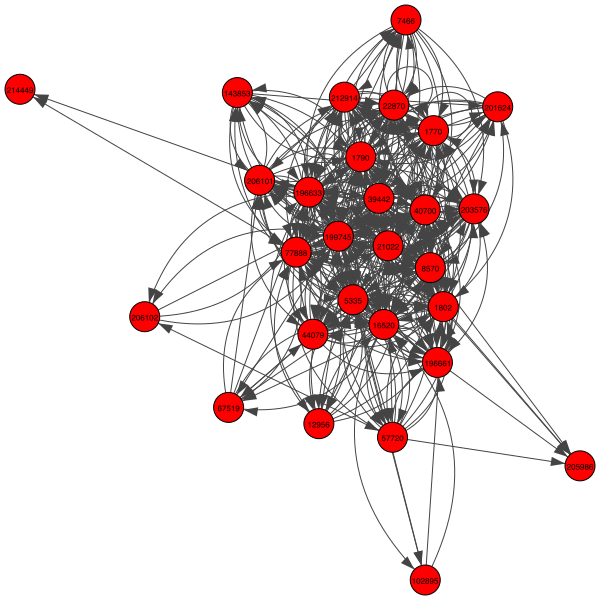

In [18]:
plot(get_sna_graph(e_Aij, 'playerID'))

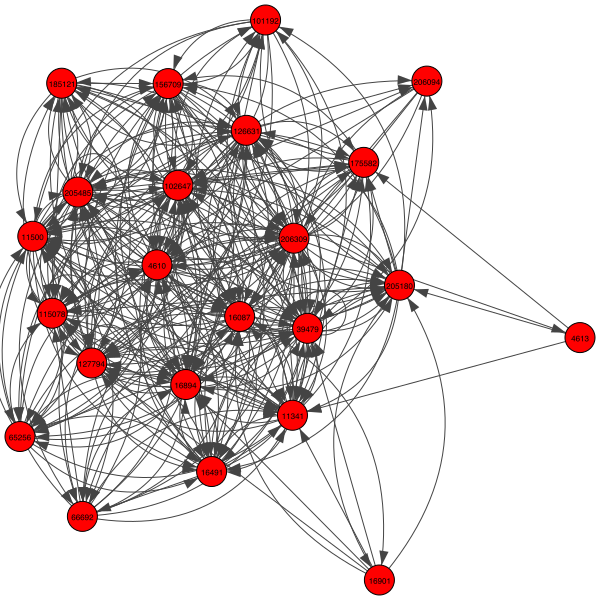

In [19]:
plot(get_sna_graph(b_Aij, 'playerID'))

#Dodavanja po pozicijama

In [20]:
e_Aij_pos = getAij(e, 'playerPositionID', 'targetPositionID')
sortDictByValue(e_Aij_pos)

[((13, 2), 122),
 ((2, 20), 118),
 ((4, 21), 105),
 ((2, 13), 103),
 ((20, 2), 101),
 ((14, 13), 101),
 ((13, 14), 94),
 ((2, 15), 80),
 ((13, 15), 76),
 ((21, 4), 76),
 ((15, 2), 73),
 ((15, 16), 70),
 ((15, 20), 69),
 ((14, 4), 69),
 ((14, 15), 68),
 ((4, 14), 68),
 ((13, 1), 66),
 ((4, 11), 65),
 ((15, 9), 63),
 ((1, 13), 61),
 ((14, 1), 59),
 ((21, 11), 57),
 ((2, 9), 56),
 ((9, 15), 56),
 ((4, 16), 55),
 ((20, 15), 52),
 ((2, 11), 51),
 ((4, 15), 48),
 ((14, 16), 48),
 ((15, 14), 47),
 ((15, 13), 47),
 ((13, 20), 46),
 ((9, 20), 46),
 ((13, 16), 45),
 ((1, 11), 44),
 ((20, 9), 44),
 ((14, 21), 44),
 ((16, 4), 44),
 ((9, 2), 44),
 ((16, 14), 44),
 ((1, 14), 44),
 ((11, 21), 42),
 ((16, 15), 42),
 ((9, 11), 41),
 ((16, 21), 40),
 ((11, 9), 39),
 ((16, 20), 39),
 ((15, 21), 39),
 ((4, 1), 37),
 ((15, 11), 36),
 ((15, 4), 36),
 ((11, 15), 36),
 ((20, 13), 36),
 ((2, 16), 35),
 ((11, 20), 34),
 ((14, 9), 34),
 ((16, 11), 34),
 ((20, 11), 34),
 ((16, 9), 33),
 ((13, 9), 33),
 ((1, 9), 3

In [21]:
writer = pd.ExcelWriter('../data/eintracht_pozicije_dodavanje.xlsx')
frame = list_to_df(e_Aij_pos)
frame.to_excel(writer)

In [22]:
b_Aij_pos = getAij(b, 'playerPositionID', 'targetPositionID')
sortDictByValue(b_Aij_pos)

[((1, 13), 141),
 ((4, 21), 133),
 ((13, 1), 128),
 ((16, 15), 127),
 ((2, 13), 123),
 ((18, 17), 123),
 ((13, 14), 116),
 ((13, 2), 113),
 ((15, 16), 111),
 ((13, 15), 109),
 ((14, 4), 108),
 ((14, 13), 108),
 ((14, 15), 104),
 ((1, 14), 100),
 ((14, 16), 100),
 ((15, 13), 98),
 ((14, 1), 97),
 ((2, 18), 93),
 ((16, 14), 92),
 ((2, 20), 91),
 ((15, 18), 90),
 ((17, 18), 89),
 ((13, 20), 86),
 ((15, 2), 85),
 ((2, 15), 85),
 ((15, 14), 84),
 ((4, 14), 83),
 ((20, 2), 83),
 ((15, 17), 80),
 ((16, 21), 79),
 ((16, 13), 78),
 ((18, 16), 76),
 ((16, 17), 73),
 ((17, 16), 73),
 ((13, 16), 72),
 ((20, 17), 72),
 ((18, 21), 71),
 ((21, 15), 70),
 ((20, 18), 70),
 ((16, 18), 70),
 ((21, 18), 69),
 ((17, 21), 69),
 ((2, 17), 67),
 ((15, 4), 66),
 ((21, 4), 66),
 ((21, 16), 66),
 ((15, 20), 65),
 ((20, 15), 65),
 ((4, 18), 65),
 ((21, 17), 62),
 ((17, 15), 62),
 ((15, 21), 62),
 ((16, 20), 61),
 ((16, 2), 61),
 ((4, 16), 60),
 ((3, 13), 58),
 ((20, 16), 55),
 ((17, 2), 54),
 ((4, 15), 54),
 ((2,

In [23]:
writer = pd.ExcelWriter('../data/borussia_pozicije_dodavanje.xlsx')
frame = list_to_df(b_Aij_pos)
frame.to_excel(writer)

In [24]:
g = get_sna_graph(e_Aij_pos, 'pos')
print(g.vs['label'])
print(g)

[9, 26, 13, 22, 14, 17, 15, 27, 20, 4, 12, 1, 8, 21, 18, 11, 2, 5, 23, 16]
IGRAPH D-W- 20 274 --
+ attr: label (v), label_size (v), pos (v), size (v), weight (e)
+ edges:
 0 ->  0  1  2  3  4  5  6  7  8  9 10 11 13 14 15 16 17 18 19      17 ->  0
2  3  4  5  6 14 18 19
 1 ->  0  2  4  7  8  9 10 13 15 16                                 18 ->  0
2  3  4  5  6 11 14 17 19
 2 ->  0  1  2  3  4  5  6  7  8  9 11 12 13 14 15 16 17 18 19      19 ->  0
2  3  4  5  6  8  9 11 12 13 14 15 16 17 18
 3 ->  0  2  4  5  6 10 11 14 17 19
 4 ->  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19
 5 ->  0  2  3  4  5  6 14 17 18 19
 6 ->  0  2  3  4  5  6  7  8  9 11 12 13 14 15 16 17 18 19
 7 ->  0  1  2  4  6  7  8  9 10 11 13 15 16
 8 ->  0  1  2  4  6  7  9 10 11 12 13 15 16 19
 9 ->  0  1  2  4  6  7  8 10 11 12 13 15 16 19
10 ->  0  1  4  7  8  9 10 13 14 15 16
11 ->  0  1  2  4  5  6  7  8  9 10 12 13 14 15 16 18 19
12 ->  2  4  6  8  9 11 13 15 16 19
13 ->  0  1  2  4  6  7  8  9 10 1

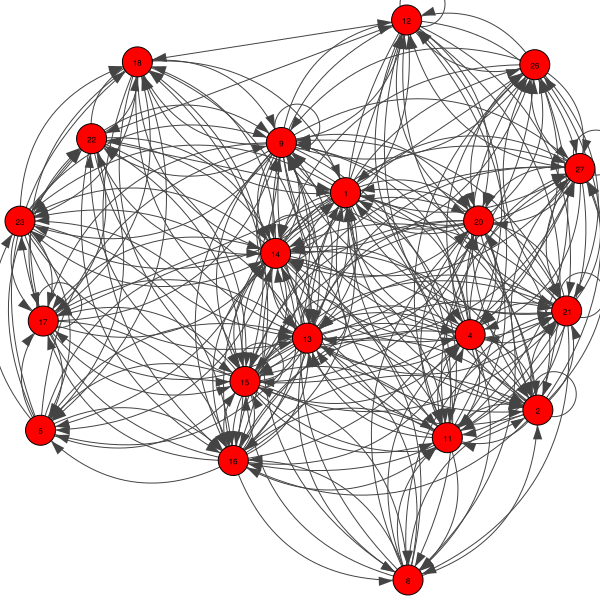

In [25]:
plot(get_sna_graph(e_Aij_pos, 'playerPositionID'))

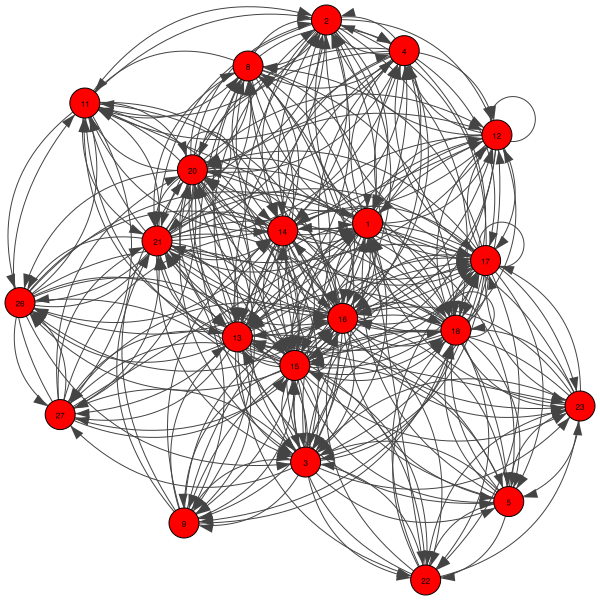

In [26]:
plot(get_sna_graph(b_Aij_pos, 'playerPositionID'))

#Dodavanja unutar formacija po pozicijama

In [27]:
e_h['domaciFormacija'].unique()

array(['4-2-3-1', '4-4-1-1', '4-3-1-2'], dtype=object)

In [28]:
e_a['gostiFormacija'].unique()

array(['4-4-1-1', '4-2-3-1', '4-5-1'], dtype=object)

##Eintracht 4-2-3-1

In [29]:
e_h_f = e_h.loc[e_h['domaciFormacija'] == '4-2-3-1']
e_a_f = e_a.loc[e_a['gostiFormacija'] == '4-2-3-1']
e_f = pd.concat([e_h_f, e_a_f])
e_Aij_f = getAij(e_f, 'playerPositionID', 'targetPositionID')
sortDictByValue(e_Aij_f)

[((2, 20), 69),
 ((13, 2), 66),
 ((2, 13), 60),
 ((4, 21), 58),
 ((20, 2), 51),
 ((13, 14), 48),
 ((15, 9), 47),
 ((14, 13), 44),
 ((15, 20), 43),
 ((21, 4), 43),
 ((2, 15), 43),
 ((9, 20), 40),
 ((2, 9), 39),
 ((14, 4), 38),
 ((14, 15), 38),
 ((15, 16), 38),
 ((4, 11), 37),
 ((15, 2), 37),
 ((20, 9), 36),
 ((14, 1), 35),
 ((4, 14), 35),
 ((9, 2), 34),
 ((9, 15), 34),
 ((20, 15), 32),
 ((2, 11), 31),
 ((13, 15), 30),
 ((1, 11), 29),
 ((4, 15), 29),
 ((14, 21), 29),
 ((9, 11), 28),
 ((15, 14), 26),
 ((11, 9), 26),
 ((21, 11), 26),
 ((16, 2), 26),
 ((4, 1), 24),
 ((16, 20), 24),
 ((13, 1), 24),
 ((15, 4), 23),
 ((13, 16), 23),
 ((14, 16), 23),
 ((15, 21), 23),
 ((2, 16), 23),
 ((20, 4), 22),
 ((21, 15), 22),
 ((16, 14), 22),
 ((15, 13), 21),
 ((1, 14), 21),
 ((16, 21), 21),
 ((11, 21), 20),
 ((14, 9), 20),
 ((11, 20), 19),
 ((13, 9), 19),
 ((4, 16), 18),
 ((16, 4), 18),
 ((16, 15), 18),
 ((15, 11), 17),
 ((13, 20), 17),
 ((11, 15), 17),
 ((2, 1), 17),
 ((9, 4), 17),
 ((1, 13), 17),
 ((4,

In [30]:
writer = pd.ExcelWriter('../data/eintracht_4231.xlsx')
frame = list_to_df(e_Aij_f)
frame.to_excel(writer)

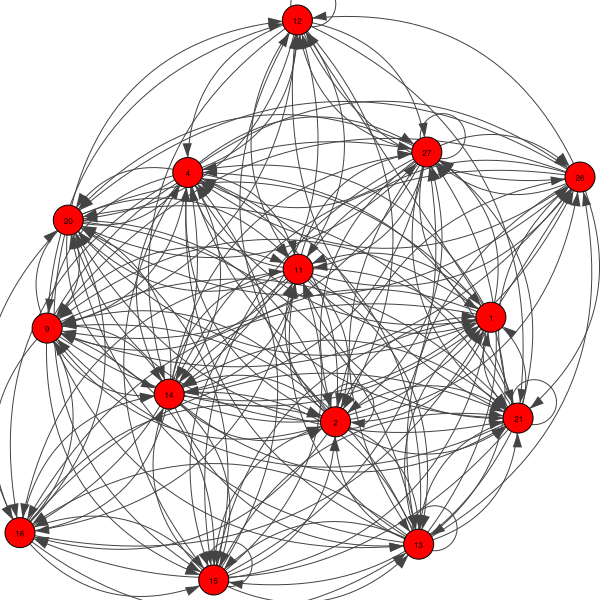

In [31]:
plot(get_sna_graph(e_Aij_f, 'playerPositionID'))

##Eintracht 4-4-1-1

In [32]:
e_h_f = e_h.loc[e_h['domaciFormacija'] == '4-4-1-1']
e_a_f = e_a.loc[e_a['gostiFormacija'] == '4-4-1-1']
e_f = pd.concat([e_h_f, e_a_f])
e_Aij_f = getAij(e_f, 'playerPositionID', 'targetPositionID')
sortDictByValue(e_Aij_f)

[((13, 2), 40),
 ((4, 21), 32),
 ((14, 13), 29),
 ((2, 20), 28),
 ((4, 14), 28),
 ((13, 15), 26),
 ((4, 16), 26),
 ((20, 2), 26),
 ((2, 13), 25),
 ((14, 15), 23),
 ((16, 4), 23),
 ((21, 11), 23),
 ((14, 4), 22),
 ((21, 4), 21),
 ((15, 16), 21),
 ((1, 13), 20),
 ((15, 20), 19),
 ((16, 11), 19),
 ((4, 11), 19),
 ((2, 15), 19),
 ((4, 15), 18),
 ((15, 2), 18),
 ((15, 14), 17),
 ((2, 9), 17),
 ((2, 11), 16),
 ((13, 14), 16),
 ((11, 21), 15),
 ((13, 20), 14),
 ((20, 11), 14),
 ((15, 13), 14),
 ((13, 1), 14),
 ((11, 20), 14),
 ((15, 11), 13),
 ((9, 11), 13),
 ((14, 16), 13),
 ((15, 21), 13),
 ((11, 9), 13),
 ((9, 15), 12),
 ((13, 16), 12),
 ((16, 15), 11),
 ((11, 15), 11),
 ((16, 21), 11),
 ((14, 1), 10),
 ((15, 4), 10),
 ((9, 2), 10),
 ((14, 21), 10),
 ((11, 16), 10),
 ((21, 16), 10),
 ((20, 13), 10),
 ((2, 16), 10),
 ((15, 9), 10),
 ((20, 15), 10),
 ((21, 9), 9),
 ((16, 14), 9),
 ((1, 14), 9),
 ((1, 9), 9),
 ((11, 2), 9),
 ((11, 4), 9),
 ((20, 9), 8),
 ((16, 9), 8),
 ((15, 1), 7),
 ((1, 11)

In [33]:
writer = pd.ExcelWriter('../data/eintracht_4411.xlsx')
frame = list_to_df(e_Aij_f)
frame.to_excel(writer)

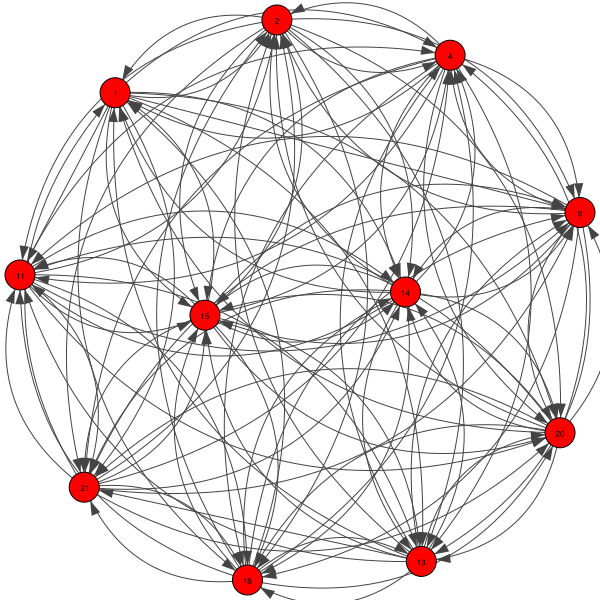

In [34]:
plot(get_sna_graph(e_Aij_f, 'playerPositionID'))

##Eintracht 4-3-1-2

In [35]:
e_h_f = e_h.loc[e_h['domaciFormacija'] == '4-3-1-2']
e_a_f = e_a.loc[e_a['gostiFormacija'] == '4-3-1-2']
e_f = pd.concat([e_h_f, e_a_f])
e_Aij_f = getAij(e_f, 'playerPositionID', 'targetPositionID')
sortDictByValue(e_Aij_f)

[((22, 15), 23),
 ((23, 14), 21),
 ((13, 22), 20),
 ((22, 9), 18),
 ((14, 13), 17),
 ((13, 1), 16),
 ((23, 9), 15),
 ((23, 16), 15),
 ((15, 17), 15),
 ((14, 23), 14),
 ((15, 22), 14),
 ((9, 22), 14),
 ((13, 14), 14),
 ((22, 13), 13),
 ((13, 17), 13),
 ((9, 18), 13),
 ((23, 1), 13),
 ((1, 13), 13),
 ((17, 15), 12),
 ((13, 15), 12),
 ((22, 18), 11),
 ((17, 22), 11),
 ((14, 1), 10),
 ((17, 23), 10),
 ((9, 14), 10),
 ((17, 18), 10),
 ((9, 15), 10),
 ((16, 23), 10),
 ((13, 9), 10),
 ((17, 9), 10),
 ((16, 9), 9),
 ((14, 9), 9),
 ((18, 17), 9),
 ((5, 16), 9),
 ((13, 5), 9),
 ((5, 9), 9),
 ((9, 17), 9),
 ((16, 15), 9),
 ((22, 5), 9),
 ((23, 18), 9),
 ((5, 23), 8),
 ((14, 18), 8),
 ((18, 9), 8),
 ((1, 14), 7),
 ((16, 14), 7),
 ((23, 17), 7),
 ((22, 17), 7),
 ((9, 16), 7),
 ((1, 9), 7),
 ((18, 23), 7),
 ((18, 16), 7),
 ((16, 18), 7),
 ((5, 17), 7),
 ((16, 17), 6),
 ((16, 5), 6),
 ((14, 16), 6),
 ((14, 22), 6),
 ((14, 5), 6),
 ((13, 16), 6),
 ((16, 13), 6),
 ((15, 9), 6),
 ((1, 17), 5),
 ((15, 18

In [36]:
writer = pd.ExcelWriter('../data/eintracht_4312.xlsx')
frame = list_to_df(e_Aij_f)
frame.to_excel(writer)

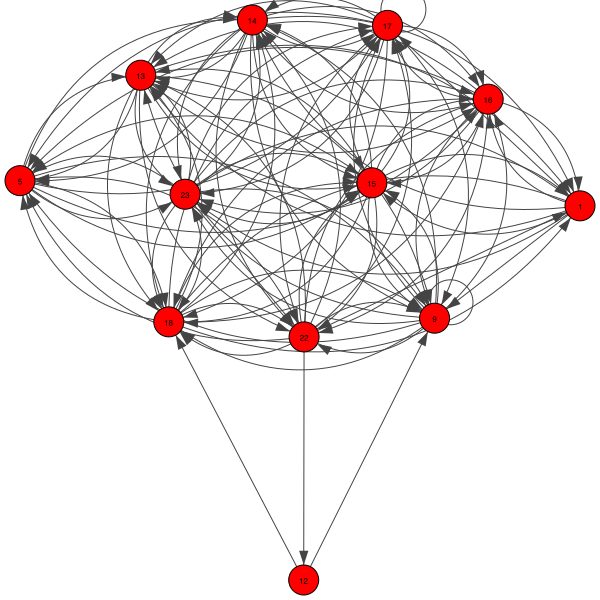

In [37]:
plot(get_sna_graph(e_Aij_f, 'playerPositionID'))

##Eintracht 4-5-1

In [38]:
e_h_f = e_h.loc[e_h['domaciFormacija'] == '4-5-1']
e_a_f = e_a.loc[e_a['gostiFormacija'] == '4-5-1']
e_f = pd.concat([e_h_f, e_a_f])
e_Aij_f = getAij(e_f, 'playerPositionID', 'targetPositionID')
sortDictByValue(e_Aij_f)

[((20, 2), 24),
 ((2, 20), 21),
 ((2, 13), 18),
 ((15, 2), 18),
 ((2, 15), 18),
 ((13, 2), 16),
 ((13, 14), 16),
 ((13, 20), 15),
 ((4, 21), 15),
 ((8, 14), 15),
 ((8, 15), 12),
 ((21, 4), 12),
 ((8, 20), 12),
 ((13, 1), 12),
 ((8, 2), 11),
 ((4, 16), 11),
 ((14, 13), 11),
 ((15, 8), 11),
 ((1, 13), 11),
 ((2, 8), 10),
 ((11, 8), 10),
 ((20, 15), 10),
 ((4, 8), 9),
 ((14, 4), 9),
 ((16, 8), 9),
 ((20, 13), 9),
 ((4, 11), 9),
 ((16, 20), 9),
 ((8, 13), 8),
 ((1, 11), 8),
 ((13, 15), 8),
 ((8, 21), 8),
 ((20, 11), 8),
 ((11, 15), 8),
 ((8, 4), 8),
 ((15, 13), 8),
 ((4, 1), 8),
 ((21, 11), 8),
 ((16, 21), 8),
 ((15, 20), 7),
 ((20, 16), 7),
 ((1, 14), 7),
 ((8, 16), 7),
 ((11, 21), 7),
 ((14, 8), 7),
 ((13, 8), 7),
 ((20, 8), 7),
 ((16, 14), 6),
 ((15, 11), 6),
 ((1, 4), 6),
 ((14, 16), 6),
 ((15, 16), 6),
 ((21, 8), 6),
 ((14, 21), 5),
 ((1, 21), 5),
 ((21, 16), 5),
 ((4, 14), 5),
 ((4, 20), 5),
 ((1, 8), 5),
 ((21, 14), 4),
 ((13, 16), 4),
 ((14, 1), 4),
 ((16, 11), 4),
 ((20, 14), 4),


In [39]:
writer = pd.ExcelWriter('../data/eintracht_451.xlsx')
frame = list_to_df(e_Aij_f)
frame.to_excel(writer)

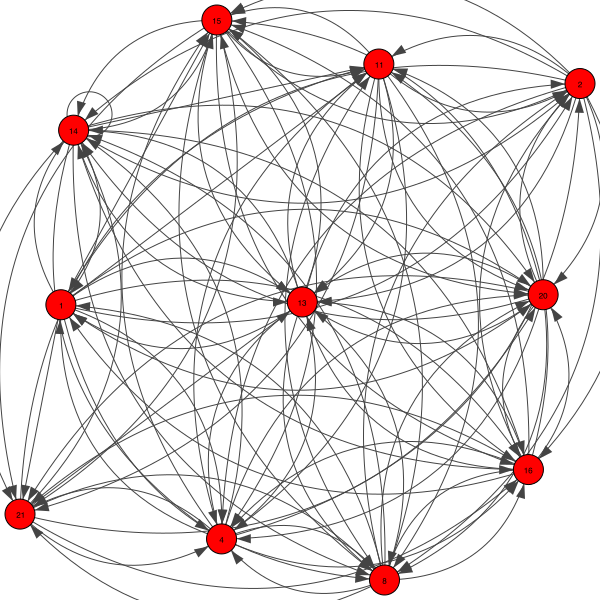

In [40]:
plot(get_sna_graph(e_Aij_f, 'playerPositionID'))

In [41]:
b_h['domaciFormacija'].unique()

array(['4-4-2', '3-5-2', '3-6-1'], dtype=object)

In [42]:
b_a['gostiFormacija'].unique()

array(['4-4-2', '3-5-2', '4-5-1'], dtype=object)

##Borussia 4-4-2

In [43]:
b_h_f = b_h.loc[b_h['domaciFormacija'] == '4-4-2']
b_a_f = b_a.loc[b_a['gostiFormacija'] == '4-4-2']
b_f = pd.concat([b_h_f, b_a_f])
b_Aij_f = getAij(b_f, 'playerPositionID', 'targetPositionID')
sortDictByValue(b_Aij_f)

[((4, 21), 122),
 ((2, 13), 109),
 ((14, 4), 102),
 ((13, 2), 100),
 ((13, 14), 100),
 ((16, 15), 98),
 ((14, 13), 96),
 ((2, 18), 93),
 ((18, 17), 89),
 ((13, 15), 88),
 ((14, 15), 88),
 ((2, 20), 84),
 ((1, 13), 84),
 ((13, 1), 83),
 ((15, 2), 78),
 ((20, 2), 78),
 ((14, 16), 77),
 ((16, 14), 76),
 ((1, 14), 76),
 ((15, 14), 76),
 ((2, 15), 76),
 ((15, 13), 74),
 ((15, 16), 73),
 ((17, 18), 73),
 ((4, 14), 71),
 ((14, 1), 69),
 ((15, 18), 67),
 ((2, 17), 67),
 ((4, 18), 65),
 ((15, 17), 64),
 ((16, 21), 63),
 ((15, 4), 62),
 ((17, 21), 61),
 ((18, 16), 61),
 ((20, 17), 60),
 ((16, 17), 60),
 ((21, 4), 60),
 ((18, 21), 59),
 ((15, 20), 58),
 ((17, 16), 58),
 ((16, 18), 58),
 ((21, 17), 58),
 ((21, 18), 57),
 ((16, 13), 56),
 ((16, 2), 55),
 ((17, 2), 54),
 ((20, 18), 54),
 ((13, 16), 53),
 ((18, 2), 50),
 ((17, 15), 49),
 ((4, 16), 49),
 ((4, 15), 49),
 ((17, 20), 48),
 ((2, 16), 47),
 ((16, 20), 47),
 ((20, 15), 47),
 ((21, 15), 45),
 ((15, 21), 45),
 ((18, 20), 44),
 ((4, 17), 43),


In [44]:
writer = pd.ExcelWriter('../data/borussia_442.xlsx')
frame = list_to_df(b_Aij_f)
frame.to_excel(writer)

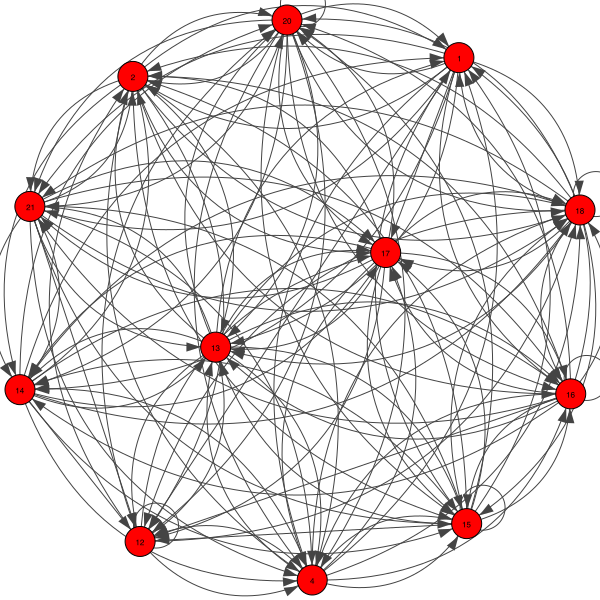

In [45]:
plot(get_sna_graph(b_Aij_f, 'playerPositionID'))

##Borussia 3-5-2

In [46]:
b_h_f = b_h.loc[b_h['domaciFormacija'] == '3-5-2']
b_a_f = b_a.loc[b_a['gostiFormacija'] == '3-5-2']
b_f = pd.concat([b_h_f, b_a_f])
b_Aij_f = getAij(b_f, 'playerPositionID', 'targetPositionID')
sortDictByValue(b_Aij_f)

[((3, 13), 41),
 ((13, 3), 40),
 ((18, 17), 34),
 ((13, 20), 32),
 ((1, 13), 32),
 ((15, 18), 23),
 ((3, 1), 22),
 ((14, 3), 22),
 ((13, 1), 22),
 ((15, 16), 21),
 ((20, 13), 20),
 ((15, 13), 19),
 ((16, 15), 19),
 ((13, 15), 18),
 ((18, 15), 17),
 ((3, 16), 17),
 ((3, 14), 17),
 ((1, 3), 16),
 ((17, 18), 16),
 ((16, 13), 16),
 ((3, 15), 16),
 ((20, 18), 16),
 ((15, 17), 16),
 ((18, 16), 15),
 ((17, 16), 15),
 ((20, 15), 14),
 ((13, 16), 13),
 ((16, 3), 13),
 ((14, 18), 13),
 ((3, 18), 13),
 ((20, 21), 13),
 ((17, 15), 13),
 ((16, 17), 13),
 ((15, 3), 13),
 ((21, 18), 12),
 ((18, 21), 12),
 ((20, 17), 12),
 ((14, 16), 12),
 ((16, 18), 12),
 ((21, 15), 11),
 ((22, 18), 10),
 ((3, 12), 9),
 ((12, 3), 9),
 ((22, 17), 9),
 ((13, 18), 9),
 ((13, 8), 9),
 ((20, 8), 9),
 ((8, 15), 8),
 ((8, 18), 8),
 ((18, 22), 8),
 ((14, 9), 8),
 ((14, 23), 8),
 ((17, 21), 8),
 ((16, 20), 8),
 ((21, 14), 7),
 ((14, 1), 7),
 ((14, 21), 7),
 ((1, 15), 7),
 ((15, 22), 7),
 ((20, 1), 7),
 ((15, 21), 7),
 ((1, 18

In [47]:
writer = pd.ExcelWriter('../data/borussia_352.xlsx')
frame = list_to_df(b_Aij_f)
frame.to_excel(writer)

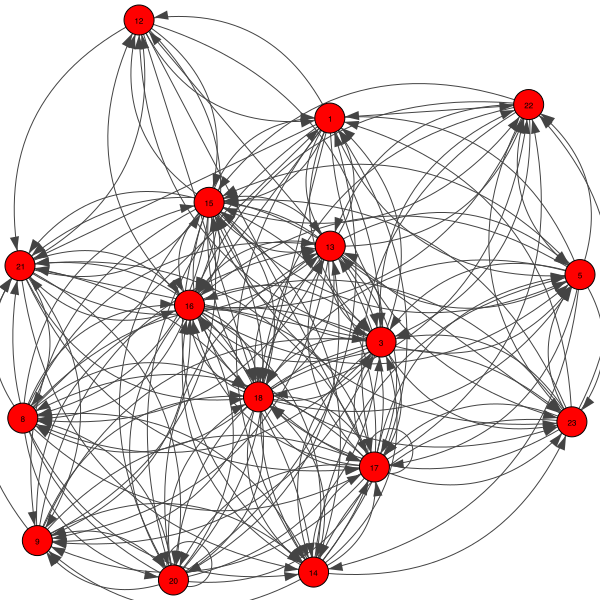

In [48]:
plot(get_sna_graph(b_Aij_f, 'playerPositionID'))

##Borussia 3-6-1

In [49]:
b_h_f = b_h.loc[b_h['domaciFormacija'] == '3-6-1']
b_a_f = b_a.loc[b_a['gostiFormacija'] == '3-6-1']
b_f = pd.concat([b_h_f, b_a_f])
b_Aij_f = getAij(b_f, 'playerPositionID', 'targetPositionID')
sortDictByValue(b_Aij_f)

[((3, 13), 17),
 ((15, 11), 14),
 ((26, 13), 14),
 ((13, 26), 13),
 ((14, 26), 12),
 ((14, 21), 11),
 ((14, 3), 11),
 ((27, 26), 10),
 ((13, 20), 10),
 ((20, 11), 10),
 ((16, 27), 10),
 ((15, 16), 10),
 ((11, 16), 10),
 ((21, 15), 9),
 ((27, 11), 9),
 ((27, 14), 9),
 ((26, 20), 8),
 ((21, 16), 8),
 ((26, 14), 8),
 ((13, 3), 8),
 ((3, 26), 7),
 ((26, 3), 7),
 ((11, 15), 7),
 ((15, 21), 7),
 ((16, 21), 7),
 ((13, 27), 7),
 ((26, 15), 7),
 ((14, 27), 7),
 ((20, 13), 7),
 ((1, 13), 7),
 ((13, 1), 7),
 ((26, 27), 7),
 ((11, 20), 7),
 ((27, 15), 6),
 ((14, 15), 6),
 ((21, 27), 6),
 ((16, 15), 6),
 ((3, 27), 6),
 ((21, 14), 5),
 ((26, 11), 5),
 ((27, 20), 5),
 ((14, 1), 5),
 ((11, 27), 5),
 ((16, 11), 5),
 ((14, 16), 5),
 ((20, 16), 5),
 ((26, 16), 5),
 ((3, 14), 5),
 ((13, 11), 5),
 ((11, 26), 5),
 ((14, 11), 5),
 ((1, 3), 4),
 ((27, 16), 4),
 ((3, 1), 4),
 ((27, 21), 4),
 ((13, 16), 4),
 ((15, 27), 3),
 ((16, 14), 3),
 ((1, 20), 3),
 ((20, 27), 3),
 ((11, 13), 3),
 ((27, 1), 3),
 ((11, 21),

In [50]:
writer = pd.ExcelWriter('../data/borussia_361.xlsx')
frame = list_to_df(b_Aij_f)
frame.to_excel(writer)

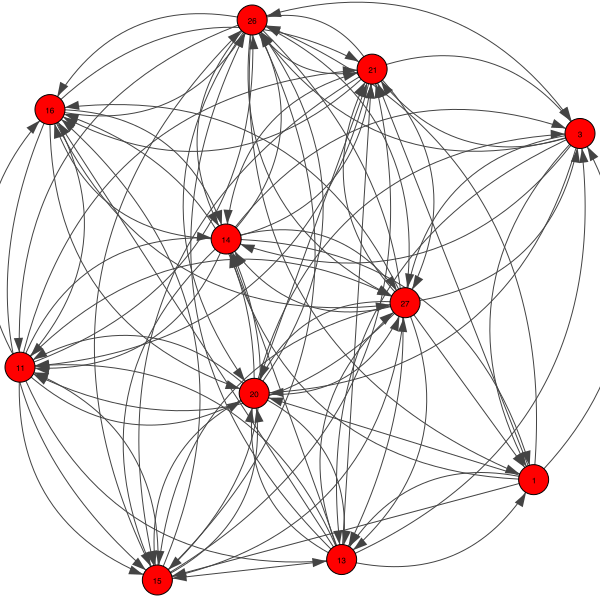

In [51]:
plot(get_sna_graph(b_Aij_f, 'playerPositionID'))

##Borussia 4-5-1

In [52]:
b_h_f = b_h.loc[b_h['domaciFormacija'] == '4-5-1']
b_a_f = b_a.loc[b_a['gostiFormacija'] == '4-5-1']
b_f = pd.concat([b_h_f, b_a_f])
b_Aij_f = getAij(b_f, 'playerPositionID', 'targetPositionID')
sortDictByValue(b_Aij_f)

[((14, 8), 22),
 ((1, 13), 18),
 ((1, 14), 17),
 ((14, 1), 16),
 ((13, 1), 16),
 ((8, 4), 15),
 ((13, 8), 15),
 ((2, 13), 14),
 ((8, 14), 14),
 ((13, 2), 13),
 ((16, 11), 12),
 ((4, 14), 12),
 ((8, 13), 11),
 ((4, 16), 11),
 ((4, 21), 11),
 ((21, 16), 11),
 ((14, 13), 11),
 ((13, 14), 11),
 ((11, 20), 11),
 ((8, 21), 10),
 ((8, 16), 9),
 ((13, 21), 9),
 ((2, 11), 9),
 ((11, 2), 9),
 ((2, 15), 9),
 ((16, 4), 8),
 ((1, 8), 8),
 ((4, 8), 7),
 ((16, 14), 7),
 ((2, 20), 7),
 ((20, 11), 7),
 ((21, 2), 7),
 ((15, 16), 7),
 ((2, 16), 7),
 ((15, 2), 7),
 ((14, 4), 6),
 ((8, 15), 6),
 ((21, 4), 6),
 ((11, 21), 6),
 ((14, 16), 6),
 ((16, 8), 6),
 ((16, 13), 6),
 ((11, 16), 6),
 ((16, 2), 6),
 ((21, 8), 6),
 ((14, 20), 6),
 ((4, 11), 6),
 ((2, 8), 5),
 ((13, 20), 5),
 ((21, 15), 5),
 ((20, 4), 5),
 ((4, 15), 5),
 ((15, 13), 5),
 ((16, 21), 5),
 ((20, 2), 5),
 ((2, 21), 5),
 ((15, 4), 4),
 ((8, 2), 4),
 ((1, 4), 4),
 ((14, 15), 4),
 ((14, 2), 4),
 ((20, 14), 4),
 ((16, 15), 4),
 ((4, 1), 4),
 ((13,

In [53]:
writer = pd.ExcelWriter('../data/borussia_451.xlsx')
frame = list_to_df(b_Aij_f)
frame.to_excel(writer)

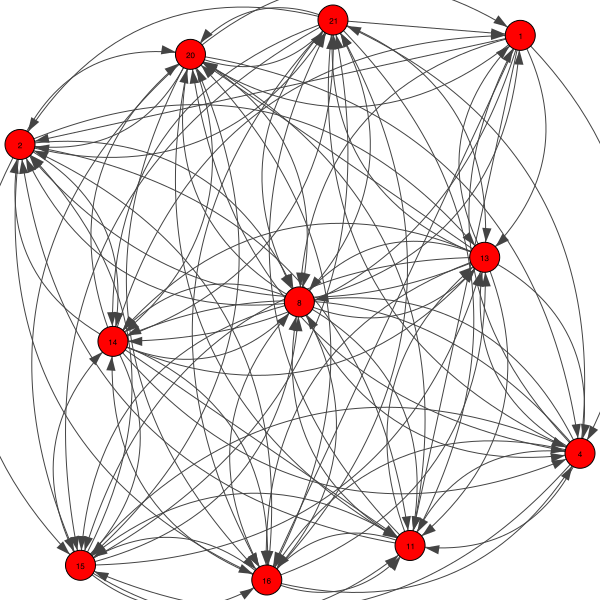

In [54]:
plot(get_sna_graph(b_Aij_f, 'playerPositionID'))